# Loading results

In [87]:
import DirectDmTargets as dddm

In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import os

In [6]:
import multihist as mh

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle
# import numpy as np
import scipy.optimize
# import matplotlib.pyplot as plt
# import seaborn as sns


In [79]:
pd.set_option('display.width', 1000000)
pd.set_option('display.max_columns', 700)

In [11]:
# loading normal results.
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_nestle_samples(
            "../../results/nestle", i)
        print()
    except FileNotFoundError:
        pass

load_nestle_samples::	loading results/../../results/nestle0/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle1/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle2/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle3/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle4/
load_nestle_samples::	done loading
access result wi

load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle39/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle40/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle41/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle42/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz',

In [164]:
def results_to_df(res):
    df = pd.DataFrame()
    items = sorted(list(res.keys()))
    df['item'] = items
    for key in res[np.min(list(res.keys()))].keys():
        if key in ['samples', 'weights']:
            continue
        if key == 'config' or key == 'res_dict':
            for sub_key in res[items[0]][key].keys():
                if sub_key == 'prior':
                    for sub_sub_key in res[items[0]][key][sub_key].keys():
                        if type(res[items[0]][key][sub_key][sub_sub_key]) == dict:
                            for sub_sub_sub_key in res[items[0]][key][sub_key][sub_sub_key].keys():
                                df[key+'_'+sub_key+'_'+sub_sub_key+'_'+sub_sub_sub_key] = [res[it][key][sub_key][sub_sub_key][sub_sub_sub_key] for it in items]
                        else:
                            df[key+'_'+sub_key+'_'+sub_sub_key] = [res[it][key][sub_key][sub_sub_key] for it in items]
                else:
                    df[key+'_'+sub_key] = [res[it][key][sub_key] for it in items]
            
        else:
            df[key] = [res[it][key] for it in items]
        
            
    df['mw'] = 10 ** df['config_mw']
    df['n_fit_parameters'] = [len(pars) for pars in df['config_fit_parameters']]
    return df
df = results_to_df(results)
df.head(5)

,item,config_detector,config_poisson,config_n_energy_bins,config_prior_log_mass_range,config_prior_log_mass_prior_type,config_prior_log_mass_param,config_prior_log_mass_dist,config_prior_log_cross_section_range,config_prior_log_cross_section_prior_type,config_prior_log_cross_section_param,config_prior_log_cross_section_dist,config_prior_density_range,config_prior_density_prior_type,config_prior_density_mean,config_prior_density_std,config_prior_density_param,config_prior_density_dist,config_prior_v_0_range,config_prior_v_0_prior_type,config_prior_v_0_mean,config_prior_v_0_std,config_prior_v_0_param,config_prior_v_0_dist,config_prior_v_esc_range,config_prior_v_esc_prior_type,config_prior_v_esc_mean,config_prior_v_esc_std,config_prior_v_esc_param,config_prior_v_esc_dist,config_prior_k_range,config_prior_k_prior_type,config_prior_k_param,config_prior_k_dist,config_v_0,config_v_esc,config_density,config_mw,config_sigma,config_halo_model,config_spectrum_class,config_det_params,config_start,config_notes,config_fit_time,config_fit_parameters,res_dict_nestle_nposterior,res_dict_nestle_time,res_dict_nestle_logZ,res_dict_nestle_logZerr,res_dict_summary,res_dict_log_mass_fit_res,res_dict_mass_fit_res,res_dict_log_cross_section_fit_res,res_dict_cross_section_fit_res,h,logl,logvol,logz,logzerr,ncall,niter,mw,n_fit_parameters
0,0,Ar,False,10,"[0.01, 4]",flat,"[0.01, 4]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-49, -44]",flat,"[-49, -44]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.55,0.1,"(0.55, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,233,3,"(233, 3)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,528,24.5,"(528, 24.5)",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.5, 3.5]",flat,"[0.5, 3.5]",<function get_priors.<locals>.<lambda> at 0x7f...,233,528,0.55,1.39794,-47.0,<DirectDmTargets.halo.SHM object at 0x7f76b84b...,<class 'DirectDmTargets.detector.DetectorSpect...,"{'exp': 10, 'cut_eff': 0.8, 'nr_eff': 0.8, 'E_...",2019-11-28 11:22:46.416072,nestle_Final_28nov13,5880,"[log_mass, log_cross_section]",6276,5880,-1.414071,0.013639,niter: 23070\nncall: 61135\nnsamples: 27166\nl...,2.60 +/- 0.88,400 +/- 8.1e+02,-47.31 +/- 1.01,4.95e-48 +/- 1.2e-47,0.7619408053516306,"[-422.29500525174035, -406.67616660478586, -39...","[-8.317888234548317, -8.318132375173317, -8.31...",-1.414070858208646,0.013638940737152223,61135,23070,25.0,2
1,1,Xe,False,10,"[0.01, 4]",flat,"[0.01, 4]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-49, -44]",flat,"[-49, -44]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.55,0.1,"(0.55, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,233,3,"(233, 3)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,528,24.5,"(528, 24.5)",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.5, 3.5]",flat,"[0.5, 3.5]",<function get_priors.<locals>.<lambda> at 0x7f...,233,528,0.55,1.39794,-47.0,<DirectDmTargets.halo.SHM object at 0x7fc9d7ad...,<class 'DirectDmTargets.detector.DetectorSpect...,"{'exp': 5, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_t...",2019-11-28 11:23:12.129522,nestle_Final_28nov15,6049,"[log_mass, log_cross_section]",9059,6049,-4.443679,0.019266,niter: 29242\nncall: 78640\nnsamples: 33338\nl...,2.43 +/- 0.84,271 +/- 5.3e+02,-46.85 +/- 0.73,1.4e-47 +/- 2.4e-47,1.5203985608168016,"[-3699.831937210356, -3510.8139806124955, -347...","[-8.317888234548317, -8.318132375173317, -8.31...",-4.4436794672702575,0.019266319183666464,78640,29242,25.0,2
2,2,Xe,False,10,"[0.1, 3]",flat,"[0.1, 3]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-46, -42]",flat,"[-46, -42]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.40,0.1,"(0.4, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,230,30,"(230, 30)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,544,33.0,"(544, 33)",<function get_priors.<locals>.<l

In [165]:
list(df.keys().values)

['item',
 'config_detector',
 'config_poisson',
 'config_n_energy_bins',
 'config_prior_log_mass_range',
 'config_prior_log_mass_prior_type',
 'config_prior_log_mass_param',
 'config_prior_log_mass_dist',
 'config_prior_log_cross_section_range',
 'config_prior_log_cross_section_prior_type',
 'config_prior_log_cross_section_param',
 'config_prior_log_cross_section_dist',
 'config_prior_density_range',
 'config_prior_density_prior_type',
 'config_prior_density_mean',
 'config_prior_density_std',
 'config_prior_density_param',
 'config_prior_density_dist',
 'config_prior_v_0_range',
 'config_prior_v_0_prior_type',
 'config_prior_v_0_mean',
 'config_prior_v_0_std',
 'config_prior_v_0_param',
 'config_prior_v_0_dist',
 'config_prior_v_esc_range',
 'config_prior_v_esc_prior_type',
 'config_prior_v_esc_mean',
 'config_prior_v_esc_std',
 'config_prior_v_esc_param',
 'config_prior_v_esc_dist',
 'config_prior_k_range',
 'config_prior_k_prior_type',
 'config_prior_k_param',
 'config_prior_k_dist'

In [189]:
summary_cols = ['config_detector','mw', 'n_fit_parameters', 'res_dict_mass_fit_res', 'config_det_params']

In [190]:
df_sel.keys().values

array(['item', 'config_detector', 'config_poisson',
       'config_n_energy_bins', 'config_prior_log_mass_range',
       'config_prior_log_mass_prior_type', 'config_prior_log_mass_param',
       'config_prior_log_mass_dist',
       'config_prior_log_cross_section_range',
       'config_prior_log_cross_section_prior_type',
       'config_prior_log_cross_section_param',
       'config_prior_log_cross_section_dist',
       'config_prior_density_range', 'config_prior_density_prior_type',
       'config_prior_density_mean', 'config_prior_density_std',
       'config_prior_density_param', 'config_prior_density_dist',
       'config_prior_v_0_range', 'config_prior_v_0_prior_type',
       'config_prior_v_0_mean', 'config_prior_v_0_std',
       'config_prior_v_0_param', 'config_prior_v_0_dist',
       'config_prior_v_esc_range', 'config_prior_v_esc_prior_type',
       'config_prior_v_esc_mean', 'config_prior_v_esc_std',
       'config_prior_v_esc_param', 'config_prior_v_esc_dist',
       'confi

In [191]:
summary_cols

['config_detector',
 'mw',
 'n_fit_parameters',
 'res_dict_mass_fit_res',
 'config_det_params']

In [194]:
mask = (
    (df['config_prior_density_mean'] == 0.40) & 
    (df['config_sigma'] == -45) &
    (df['mw'] < 51) & (df['mw'] > 49)
#     (df['mw'] < 26) & (df['mw'] > 24)
#     (len(df['config_fit_parameters']) == 2)
)
df_sel =df[mask]
values = np.array([np.float(val.split('+/-')[0]) for val in df_sel['res_dict_mass_fit_res']])
errors = np.array([np.float(val.split('+/-')[1]) for val in df_sel['res_dict_mass_fit_res']])

df_sel['dmw'] = errors/values
if 'dmw' not in summary_cols:
    summary_cols += ['dmw']
res = {}
for sel in np.unique(df_sel['config_notes']):
    print(sel)
    sub_sel = df['config_notes'] == sel
    res[sel]=df_sel[sub_sel][summary_cols]


nestle_Final_28nov1
nestle_Final_28nov2
nestle_Final_28nov3
nestle_Final_28nov4
nestle_Final_28nov5
nestle_Final_28nov6


/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [200]:
for sel in np.unique(df_sel['config_notes']):
    print(res[sel]['config_detector'], res[sel]['config_det_params'].values)

28    Ar
Name: config_detector, dtype: object [{'exp': 10, 'cut_eff': 0.8, 'nr_eff': 0.8, 'E_thr': 30, 'res': '<function det_res_Ar at 0x7fa476207f80>', 'exp_eff': 6.4, 'name': 'Ar'}]
32    Ge
Name: config_detector, dtype: object [{'exp': 3, 'cut_eff': 0.8, 'nr_eff': 0.9, 'E_thr': 10, 'res': '<function det_res_Ge at 0x7f1c8d03c290>', 'exp_eff': 2.1600000000000006, 'name': 'Ge'}]
38    Xe
Name: config_detector, dtype: object [{'exp': 5, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10, 'res': '<function det_res_Xe at 0x7f945d3aaf80>', 'exp_eff': 2.0, 'name': 'Xe'}]
46    Ar
Name: config_detector, dtype: object [{'exp': 10, 'cut_eff': 0.8, 'nr_eff': 0.8, 'E_thr': 30, 'res': '<function det_res_Ar at 0x7fa14dd13f80>', 'exp_eff': 6.4, 'name': 'Ar'}]
50    Ge
Name: config_detector, dtype: object [{'exp': 3, 'cut_eff': 0.8, 'nr_eff': 0.9, 'E_thr': 10, 'res': '<function det_res_Ge at 0x7f3c4bee1290>', 'exp_eff': 2.1600000000000006, 'name': 'Ge'}]
53    Xe
Name: config_detector, dtype: object [{'exp'

In [175]:
results[0]['res_dict'].keys()

dict_keys(['nestle_nposterior', 'nestle_time', 'nestle_logZ', 'nestle_logZerr', 'summary', 'log_mass_fit_res', 'mass_fit_res', 'log_cross_section_fit_res', 'cross_section_fit_res'])

In [38]:
for i in results.keys():
    if results[i]['config']['notes'] =='nestle++priors_23nov':
        cmd = f'rm -r ../results/nestle_17nov{i}'
        print(cmd)
        !$cmd

In [39]:
det = "Ar"
print(f"selecting {det} dataset")
selected_keys = []
for i in results.keys():
    if results[i]['config']['n_energy_bins'] == 10:
        if results[i]['config']['detector'] == det:
            print(i,
                  results[i]['config']['notes'], 
                  10**results[i]['config']['mw'],
                  results[i]['config']['sigma'],
                  results[i]['config']['prior']['v_0']['mean'],
                  results[i]['config']['prior']['density']['mean'],
                  np.shape(results[i]['samples']))
            selected_keys.append(i)    
np.array(selected_keys)

selecting Ar dataset
13 nestle++priors_17nov 25.000000000000007 -45 233 0.55 (182661, 2)
17 nestle++priors_17nov 249.99999999999994 -45 233 0.55 (162723, 2)
19 nestle++priors_17nov 49.99999999999999 -45 233 0.55 (190775, 2)
22 nestle++priors_17nov 25.000000000000007 -45 233 0.55 (181920, 5)
23 nestle++priors_17nov 249.99999999999994 -45 233 0.55 (162444, 5)
27 nestle++priors_17nov 49.99999999999999 -45 233 0.55 (190104, 5)
30 nestle++priors_17nov 25.000000000000007 -45 233 0.55 (728317, 2)
34 nestle++priors_17nov 249.99999999999994 -45 233 0.55 (650373, 2)
37 nestle++priors_17nov 25.000000000000007 -45 230 0.4 (175595, 2)
40 nestle++priors_17nov 249.99999999999994 -45 230 0.4 (159406, 2)
42 nestle++priors_17nov 49.99999999999999 -45 230 0.4 (183998, 2)
45 nestle++priors_17nov 25.000000000000007 -45 230 0.4 (174672, 5)
47 nestle++priors_17nov 249.99999999999994 -45 230 0.4 (159999, 5)
51 nestle++priors_17nov 49.99999999999999 -45 230 0.4 (183259, 5)
56 nestle++priors_17nov 25.0000000000

array([ 13,  17,  19,  22,  23,  27,  30,  34,  37,  40,  42,  45,  47,
        51,  56,  59,  62,  65,  67,  69,  72,  75,  76,  77,  80,  81,
        84,  86,  87,  91,  92,  95,  96,  97, 103, 104, 112, 115, 126,
       127, 131, 132, 137, 138, 143, 145, 147, 148, 151, 156])

In [40]:
selected_keys_sets = [[143,147,151],
                      [145,148,156],
#                       selected_keys[-6:-3],
#                       selected_keys[-3:]
                     ]
selected_keys_names = ["benchmark SHM constrained fit",
                      "benchmark SHM astr. unconstraint fit",
#                       "updated SHM constrained fit",
#                       "updated SHM astr. unconstraint fit"
                      ]
selected_keys_sets

[[143, 147, 151], [145, 148, 156]]

In [41]:
# for key in results.keys():
# # for key in selected_keys:
#     print(f"---{key}---")
#     result = results[key]
#     dddm.nestle_corner(result, save = f"../results/nestle_17nov{key}/")

In [42]:
def get_posterior(samples, weights):
    # re-scale weights to have a maximum of one
    nweights = weights/np.max(weights)

    # get the probability of keeping a sample from the weights
    keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]
    # get the posterior samples
    return samples[keepidx,:]


In [43]:
def bin_center(xedges, yedges):
    return 0.5 * (xedges[0:-1] + xedges[1:]), 0.5 * (yedges[0:-1] + yedges[1:])
    

In [44]:
def get_hist(item, nbins = 45):
#     nbins = 45
    bin_range = [[1, 3], [-46, -44]]
    counts, xedges, yedges = np.histogram2d(*get_p_i(item), bins = nbins, range = bin_range)
    return counts , xedges, yedges

def get_hist_norm(item):
    counts , xedges, yedges = get_hist(item)
    return counts/np.sum(counts) , xedges, yedges

In [45]:
# # fig = plt.figure(figsize=(7, 3))
# # ax = fig.add_subplot(131, title='imshow: square bins')
# from matplotlib.colors import LogNorm
# plt.imshow(test.T/np.sum(test.T), interpolation='nearest', origin='low',
#         extent=  [1, 3, -45.7, -44.3], norm=LogNorm())
# # plt.legend()
# plt.colorbar()

In [46]:
def get_p_i(i):
    m, sig = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
    return np.array([m, sig])

In [47]:
from matplotlib.colors import LogNorm
def combine_normalized(items):
    X, Y = np.meshgrid(*get_hist_norm(items[0])[1:])
    for i in items:
        c,_,_ = get_hist_norm(i)
        im = plt.pcolor(X,Y,c.T, norm=LogNorm(vmin = 1e-4,vmax = 1))  
    plt.colorbar()

In [48]:
def pow10(x):
    return 10 ** x

In [68]:
def confidence_plot(items, text_box = False):
    fig,ax=plt.subplots(figsize = (8,6))
    for k, item in enumerate(items):#, 78, 110 
        x,y =get_p_i(item)
        # Make a 2d normed histogram
        bin_range = [[0.5, 3], [-49, -46]]
        H,xedges,yedges=np.histogram2d(x,y,bins=500, range = bin_range, normed=True)

        norm=H.sum() # Find the norm of the sum
        # Set contour levels
        contour1=0.99
        contour2=0.95
        contour3=0.68
        # Take histogram bin membership as proportional to Likelihood
        # This is true when data comes from a Markovian process
        def objective(limit, target):
            w = np.where(H>limit)
            count = H[w]
            return count.sum() - target
        target1 = norm*contour1
        target2 = norm*contour2
        target3 = norm*contour3

        # Find levels by summing histogram to objective
        level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
        level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
        level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

        levels=[level1, level2, level3,H.max()]
        # Pass levels to normed kde plot
        def av_levels(x):
            return [(x[i] + x[i+1])/2 for i in range(len(x)-1)]

        if levels[0]==levels[1]:
            print("ERRRRRRRRR\n\n")
            print(levels)
            levels[0] /= 1.01
            levels = np.unique(levels)
            print(levels)
        sns_ax = sns.kdeplot(x,y, shade=True,ax=ax,n_levels=levels,cmap="viridis",normed=True, 
                    cbar = False, vmin=levels[0], vmax=levels[-1])
        kwargs = {}
        if k is 0:
            kwargs['label'] = 'best fit'
        plt.scatter(np.mean(x),np.mean(y), c='black',
                    marker = '+',**kwargs)
        if k is 0:
            kwargs['label'] = 'benchmark value'
        plt.scatter(results[item]['config']['mw'],
                    results[item]['config']['sigma'], c='blue',
                    marker = 'x',
                    **kwargs)
        if k is 0:
            cbar = ax.figure.colorbar(sns_ax.collections[0])
            cbar.set_ticks(av_levels(np.linspace(0,1,4)))
            cbar.set_ticklabels(['$3\sigma$', '$2\sigma$', '$1\sigma$'])
            cbar.set_label("Posterior probability")
    secax = ax.secondary_xaxis('top', functions=(pow10, np.log10))
    x_ticks = [15, 25, 50, 100, 250, 500, 1000]
    for x_tick in x_ticks:
        ax.axvline(np.log10(x_tick), alpha = 0.1)
    secax.set_ticks(x_ticks)
    plt.xlim(np.log10(x_ticks[0]),np.log10(x_ticks[-1]))
    plt.xlabel("$\log_{10}(M_{\chi}$ $[GeV/c^{2}]$)")
    secax.set_xlabel("$M_{\chi}$ $[GeV/c^{2}]$")
    plt.ylabel("$\log_{10}(\sigma_{S.I.}$ $[cm^{2}]$)")
    plt.legend()

    if text_box:
        plt.text(0.05, 0.95, text_box, 
                 bbox=dict(facecolor="white",
                           boxstyle="round"), 
                 transform=ax.transAxes,
                 alpha=0.5)
#     plt.show()


ERRRRRRRRR


[18.335166850016993, 18.335166850016993, 18.335166850016993, 36.67033370003607]
[18.15363054 18.33516685 36.6703337 ]


/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


ERRRRRRRRR


[14.076576576574743, 14.076576576574743, 14.076576576574743, 28.153153153152687]
[13.93720453 14.07657658 28.15315315]
ERRRRRRRRR


[12.746972594007264, 12.746972594007264, 12.746972594007264, 25.493945188017424]
[12.62076494 12.74697259 25.49394519]


/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


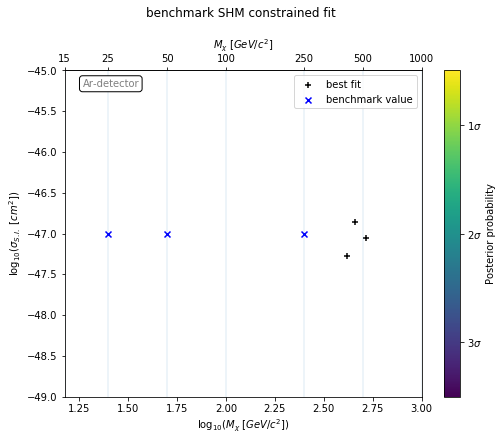

ERRRRRRRRR


[18.601190476189114, 18.601190476189114, 18.601190476189114, 37.20238095238034]
[18.41702027 18.60119048 37.20238095]


/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


ERRRRRRRRR


[14.524328249816556, 14.524328249816556, 14.524328249816556, 29.04865649963641]
[14.38052302 14.52432825 29.0486565 ]
ERRRRRRRRR


[12.77139208173585, 12.77139208173585, 12.77139208173585, 25.542784163503644]
[12.64494266 12.77139208 25.54278416]


/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


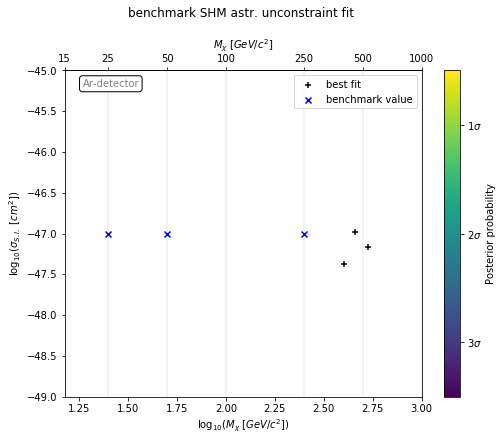

In [70]:
for i, name in enumerate(selected_keys_names):
    confidence_plot(selected_keys_sets[i], text_box = f'{det}-detector')
#     if "realistic" in name:
    plt.ylim(-49, -45)
#     else:
#         plt.ylim(-45.7, -44.3)
    plt.title(f'{name} \n')
    plt.savefig(f"figures/{det}_{name.replace(' ', '-')}.png", dpi =300, bbox_inches="tight")
    plt.savefig(f"figures/{det}_{name.replace(' ', '-')}.pdf", dpi =300, bbox_inches="tight")
    plt.show()
                
#     break

In [71]:
det = "Ge"
print(f"selecting {det} dataset")
selected_keys = []
for i in results.keys():
    if results[i]['config']['n_energy_bins'] == 10:
        if results[i]['config']['detector'] == det:
            print(i,
                  results[i]['config']['notes'], 
                  10**results[i]['config']['mw'],
                  results[i]['config']['sigma'],
                  results[i]['config']['prior']['v_0']['mean'],
                  results[i]['config']['prior']['density']['mean'],
                  np.shape(results[i]['samples']))
            selected_keys.append(i)    
np.array(selected_keys)

selecting Ge dataset
0 nestle++priors_17nov 49.99999999999999 -45 233 0.55 (213818, 5)
14 nestle++priors_17nov 25.000000000000007 -45 233 0.55 (214475, 2)
15 nestle++priors_17nov 249.99999999999994 -45 233 0.55 (172532, 2)
18 nestle++priors_17nov 49.99999999999999 -45 233 0.55 (214107, 2)
24 nestle++priors_17nov 249.99999999999994 -45 233 0.55 (172076, 5)
25 nestle++priors_17nov 25.000000000000007 -45 233 0.55 (214808, 5)
31 nestle++priors_17nov 25.000000000000007 -45 233 0.55 (859044, 2)
32 nestle++priors_17nov 249.99999999999994 -45 233 0.55 (689730, 2)
35 nestle++priors_17nov 49.99999999999999 -45 233 0.55 (858662, 2)
38 nestle++priors_17nov 249.99999999999994 -45 230 0.4 (168552, 2)
39 nestle++priors_17nov 25.000000000000007 -45 230 0.4 (209369, 2)
43 nestle++priors_17nov 49.99999999999999 -45 230 0.4 (209566, 2)
48 nestle++priors_17nov 249.99999999999994 -45 230 0.4 (169039, 5)
50 nestle++priors_17nov 25.000000000000007 -45 230 0.4 (209862, 5)
52 nestle++priors_17nov 49.9999999999

array([  0,  14,  15,  18,  24,  25,  31,  32,  35,  38,  39,  43,  48,
        50,  52,  57,  58,  60,  61,  66,  68,  73,  79,  83,  85,  89,
        94,  98, 100, 105, 108, 109, 111, 114, 117, 119, 121, 122, 124,
       129, 134, 136, 139, 140, 141, 144, 149, 150, 152, 153, 159])

In [27]:
selected_keys_sets = [[89, 98, 100],
                      [134,136,140],
#                       selected_keys[-6:-3],
#                       selected_keys[-3:]
                     ]
selected_keys_names = ["benchmark SHM constrained fit",
                      "benchmark SHM astr. unconstraint fit",
#                       "updated SHM constrained fit",
#                       "updated SHM astr. unconstraint fit"
                      ]
selected_keys_sets

[[89, 98, 100], [134, 136, 140]]

/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


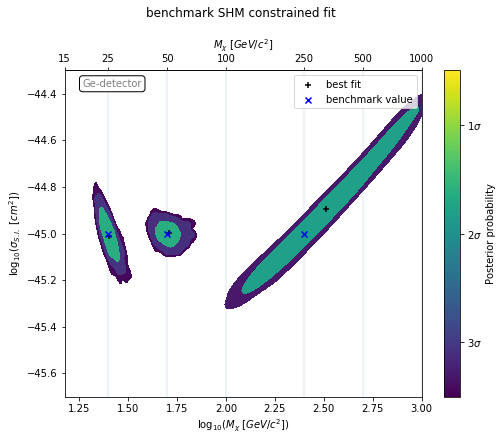

/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


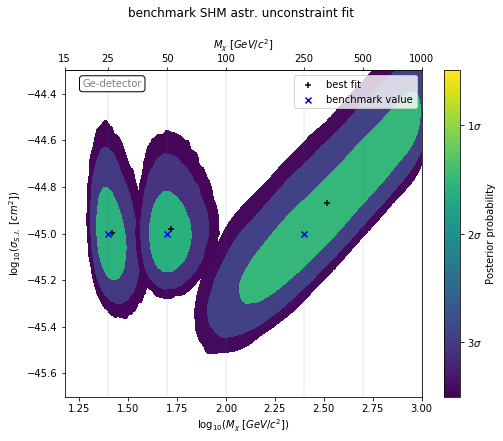

In [28]:
for i, name in enumerate(selected_keys_names):
    confidence_plot(selected_keys_sets[i], text_box = f'{det}-detector')
    if "realistic" in name:
        plt.ylim(-49, -45)
    else:
        plt.ylim(-45.7, -44.3)
    plt.title(f'{name} \n')
    plt.savefig(f"figures/{det}_{name.replace(' ', '-')}.png", dpi =300, bbox_inches="tight")
    plt.savefig(f"figures/{det}_{name.replace(' ', '-')}.pdf", dpi =300, bbox_inches="tight")
    plt.show()
                

In [ ]:
def get_quantile(item):
    _, xedges, _ = get_hist(item, nbins = 1000)
    data = get_p_i(item)
    results = np.zeros((len(xedges),3))
#     print(results)
    for i in range(len(xedges) - 1):
#         print(bin_i)
        mask = (xedges[i] < data[0]) & (data[0] < xedges[i+1])
        if np.sum(mask)>0:
#             print()
            results[i] =  0.5 * (xedges[i]+ xedges[i+1]), *np.percentile(data[1][mask], [5,95])
    return results[results[:,0] > 0]

In [ ]:
quantiles = get_quantile(0)
# quantiles = quantiles[quantiles]
plt.plot(quantiles[:,0],quantiles[:,1])
plt.plot(quantiles[:,0],quantiles[:,2])
# quantiles

In [ ]:
counts = get_hist(0)[0]
centers = bin_center(*get_hist(0)[1:])

In [ ]:
for count in counts.T:
    print(np.percentile(count, [5, 95]))

In [ ]:
combine_normalized([0])
quantiles = get_quantile(0)
# quantiles = quantiles[quantiles]
plt.plot(quantiles[:,0],quantiles[:,1])
plt.plot(quantiles[:,0],quantiles[:,2])

In [ ]:
np.shape(get_p_i(0)[:,])

In [ ]:
test = get_p_i(0)
np.array(test)[:,:100]

In [ ]:
confidence_plot([74, 78, 110])

In [53]:
# import numpy as np
# import scipy.optimize
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Generate some random data
# # x,y=np.random.randn(2,100000)
# fig,ax=plt.subplots(figsize = (8,6))
# for k, item in enumerate([74, 78, 110]):#, 78, 110 
#     x,y =get_p_i(item)
#     # Make a 2d normed histogram
#     H,xedges,yedges=np.histogram2d(x,y,bins=40,normed=True)

#     norm=H.sum() # Find the norm of the sum
#     # Set contour levels
#     contour1=0.99
#     contour2=0.95
#     contour3=0.68
#     # Take histogram bin membership as proportional to Likelihood
#     # This is true when data comes from a Markovian process
#     def objective(limit, target):
#         w = np.where(H>limit)
#         count = H[w]
#         return count.sum() - target
# #     contour={}
# #     target={}
# #     level={}
# #     sigmas = np.flip(range(2,4))
# #     for s in sigmas:
# #         contour[s] = sigma_to_p(s)
# #         print(contour[s])
# #         target[s]=norm*contour[s]
# #         level[s]=scipy.optimize.bisect(objective, H.min(), H.max(), args=(target[s],))
# #     # Set target levels as percentage of norm
#     target1 = norm*contour1
#     target2 = norm*contour2
#     target3 = norm*contour3



#     # Find levels by summing histogram to objective
#     level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
#     level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
#     level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

#     # For nice contour shading with seaborn, define top level
# #     level[s+1]=H.max()
# #     levels=[level[s] for s in sigmas]
# #     levels.append(H.max())
#     levels=[level1, level2, level3,H.max()]
#     print(levels)
#     # Pass levels to normed kde plot
#     def av_levels(x):
#         return [(x[i] + x[i+1])/2 for i in range(len(x)-1)]
    
# #     sns_ax = sns.kdeplot(x,y, shade=True,ax=ax,n_levels=levels,cmap="viridis",normed=True, 
# #                 cbar = True, vmin=levels[0], vmax=levels[-1], 
# #                          cbar_kws={#"ticklocation":av_levels(levels),
# #                                    "ticks":[],
# #                                    #"format":">%s<"
# # #                                    "format":av_levels(levels)
# # #                                   "ticks":[1,3,4]
# #                                    "label":"significance"
# #                                   })
    
#     if levels[0]==levels[1]:
#         print("ERRRRRRRRR\n\n")
#         levels[0] /= 1.01
#     sns_ax = sns.kdeplot(x,y, shade=True,ax=ax,n_levels=levels,cmap="viridis",normed=True, 
#                 cbar = False, vmin=levels[0], vmax=levels[-1])
# #                          cbar_kws={#"ticklocation":av_levels(levels),
# #                                    "ticks":[],
# #                                    #"format":">%s<"
# # #                                    "format":av_levels(levels)
# # #                                   "ticks":[1,3,4]
# #                                    "label":"significance"
# #                                   })
#                             #          "labels":levels})
# #     fig.colorbar(cax,ticks=[-1, 0, 1])
# #     ax.set_aspect('equal')
#     kwargs = {}
#     if k is 0:
#         kwargs['label'] = 'best fit'
#     plt.scatter(np.mean(x),np.mean(y), c='black',
#                 marker = '+',**kwargs)
#     if k is 0:
#         kwargs['label'] = 'benchmark value'
#     plt.scatter(results[item]['config']['mw'],
#                 results[item]['config']['sigma'], c='blue',
#                 marker = 'x',
#                 **kwargs)
#     if k is 0:
#         cbar = ax.figure.colorbar(sns_ax.collections[0])
#     #     cbar = sns_ax.figure.colorbar()#[0].colorbar
#     #     print(av_levels(levels))
#     #     cbar.set_ticks(av_levels(levels))
#         cbar.set_ticks(av_levels(np.linspace(0,1,4)))
#     #     print(level1)
#         cbar.set_ticklabels(['$3\sigma$', '$2\sigma$', '$1\sigma$'])
#         cbar.set_label("Confidence interval")
#     #     cbar.set_nbins(4)
# secax = ax.secondary_xaxis('top', functions=(pow10, np.log10))
# # ax1.set_xticklabels([1])
# # ax.set_xlim(np.log10(10),np.log10(1000))
# x_ticks = [15, 25, 50, 100, 250, 500, 1000]
# for x_tick in x_ticks:
#     ax.axvline(np.log10(x_tick), alpha = 0.1)
# secax.set_ticks(x_ticks)
# plt.xlim(np.log10(x_ticks[0]),np.log10(x_ticks[-1]))
# plt.xlabel("$\log_{10}(M_{\chi}$ $[GeV/c^{2}]$)")
# secax.set_xlabel("$M_{\chi}$ $[GeV/c^{2}]$")
# plt.ylabel("$\log_{10}(\sigma_{S.I.}$ $[cm^{2}]$)")
# plt.legend()
# plt.show()


In [54]:
cbar

NameError: name 'cbar' is not defined

In [55]:
def 

SyntaxError: invalid syntax (<ipython-input-55-455680ca2399>, line 1)

In [56]:
sigma_to_p(2)

NameError: name 'sigma_to_p' is not defined

In [57]:
from scipy.special import erf
def sigma_to_p(x):
    return erf(x/np.sqrt(2))

for x in range(1,5):
    print(x, sigma_to_p(x))

1 0.6826894921370859
2 0.9544997361036416
3 0.9973002039367398
4 0.9999366575163338


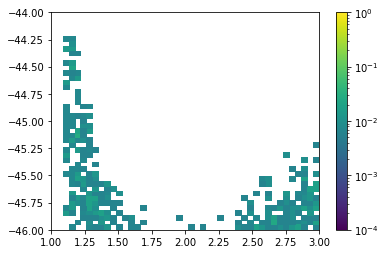

In [60]:
combine_normalized(selected_keys_sets[0])

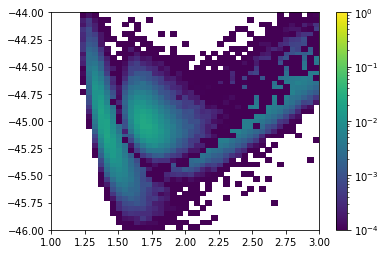

In [59]:
combine_normalized(selected_keys[3:6])

In [ ]:
np.percentile(np.linspace(0,100,100), [5,95])

In [ ]:
items = selected_keys[:3]
def get_df(items):
#     df = pd.DataFrame()
    for j, item in enumerate(items):
        posteriors = get_p_i(item)
        test_df = pd.DataFrame()
        
        test_df['$\log(M_\chi)$'] = posteriors[0]
        test_df['$\log(\sigma)$'] = posteriors[1]
        test_df['mass'] = 10**results[item]['config']['mw']
#         sns.jointplot(x="x", y="y", data=test_df, kind="kde",
#                      ylim = [-46,-44],
#                      xlim = [1,3]);
        if j == 0:
            df = test_df
        else:
            df = pd.concat([df, test_df])
#     df = df.assign(industry='yyy')
    return df
data = get_df(items)
print(np.unique(data.mass), len(data))
data.head(3)

In [ ]:
def plot_set(items, save_as):
    # data = sns.load_dataset('iris')
    # plt.figure(figsize=(15,10))
    data = get_df(items)
    print(np.unique(data.mass), len(data))
    def make_kde(*args, **kwargs):  
        #"cbar":True, 
    #     opts ={"n_levels":5}
        sns.kdeplot(n_levels = 3, *args, cmap=next(make_kde.cmap_cycle), **kwargs)

    def make_kde_cbar(*args, **kwargs):  
        #"cbar":True, 
    #     opts ={"n_levels":5}
        sns.kdeplot(n_levels = 3, cbar = True, *args, cmap=next(make_kde.cmap_cycle), **kwargs)
    kwargs ={"cbar":True, "n_levels":5}
    make_kde.cmap_cycle = cycle(('Blues_r', 'Oranges_r', 'Greens_r'))

    pg = sns.PairGrid(data, vars=('$\log(M_\chi)$', '$\log(\sigma)$'), hue='mass')
    pg.map_diag(sns.kdeplot)#, color = ({)'b', 'g', 'r'})
    pg.map_lower(make_kde)
    # pg.map_upper(make_kde_cbar)
    pg.fig.set_size_inches(15,10)
    pg.fig.savefig(f"{det}_{save_as}.png", dpi =300)
    pg.fig.savefig(f"{det}_{save_as}.pdf", dpi =300)
    plt.title(f"{save_as}")
    plt.show()
  

In [ ]:
for k in range(len(selected_keys_names)):
    plot_set(selected_keys_sets[k], selected_keys_names[k])

In [ ]:
# loading normal results.
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_nestle_samples(
            "../../results/nestle_17nov", i)
        print()
    except FileNotFoundError:
        pass

In [ ]:
print(f"selecting {det} dataset")
selected_keys = []
for i in results.keys():
    if results[i]['config']['n_energy_bins'] == 10:
        if results[i]['config']['detector'] == det:
            print(i,
                  results[i]['config']['notes'], 
                  10**results[i]['config']['mw'],
                  np.shape(results[i]['samples']))
            selected_keys.append(i)    
selected_keys

In [ ]:
# for key in results.keys():
for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    dddm.nestle_corner(result)

In [ ]:
combine_normalized(selected_keys[1:4])

In [ ]:
combine_normalized([selected_keys[0], *selected_keys[4:6]])

In [ ]:
# items = selected_keys[:3]
def get_df(items):
#     df = pd.DataFrame()
    for j, item in enumerate(items):
        posteriors = get_p_i(item)
        test_df = pd.DataFrame()
        
        test_df['$\log(M_\chi)$'] = posteriors[0]
        test_df['$\log(\sigma)$'] = posteriors[1]
        test_df['mass'] = 10**results[item]['config']['mw']
#         sns.jointplot(x="x", y="y", data=test_df, kind="kde",
#                      ylim = [-46,-44],
#                      xlim = [1,3]);
        if j == 0:
            df = test_df
        else:
            df = pd.concat([df, test_df])
#     df = df.assign(industry='yyy')
    return df

In [ ]:
items = [14,15,18]
data = get_df(items)
print(np.unique(data.mass), len(data))
data.head(3)

In [ ]:
%%time
# data = sns.load_dataset('iris')
# plt.figure(figsize=(15,10))
def make_kde(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, *args, cmap=next(make_kde.cmap_cycle), **kwargs)

def make_kde_cbar(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, cbar = True, *args, cmap=next(make_kde.cmap_cycle), **kwargs)
kwargs ={"cbar":True, "n_levels":5}
make_kde.cmap_cycle = cycle(('Blues_r', 'Oranges_r', 'Greens_r'))

pg = sns.PairGrid(data, vars=('$\log(M_\chi)$', '$\log(\sigma)$'), hue='mass')
pg.map_diag(sns.kdeplot)#, color = ({)'b', 'g', 'r'})
pg.map_lower(make_kde)
# pg.map_upper(make_kde_cbar)
pg.fig.set_size_inches(15,10)
pg.fig.savefig(f"{det}_fixed_astroph.png", dpi =300)
pg.fig.savefig(f"{det}_fixed_astroph.pdf", dpi =300)

In [ ]:
items = [24, 25, 0]
data = get_df(items)
print(np.unique(data.mass), len(data))
data.head(3)

In [ ]:
%%time
# data = sns.load_dataset('iris')
# plt.figure(figsize=(15,10))
def make_kde(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, *args, cmap=next(make_kde.cmap_cycle), **kwargs)

def make_kde_cbar(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, cbar = True, *args, cmap=next(make_kde.cmap_cycle), **kwargs)
kwargs ={"cbar":True, "n_levels":5}
make_kde.cmap_cycle = cycle(('Blues_r', 'Oranges_r', 'Greens_r'))

pg = sns.PairGrid(data, vars=('$\log(M_\chi)$', '$\log(\sigma)$'), hue='mass')
pg.map_diag(sns.kdeplot)#, color = ({)'b', 'g', 'r'})
pg.map_lower(make_kde)
# pg.map_upper(make_kde_cbar)
pg.fig.set_size_inches(15,10)
pg.fig.savefig(f"{det}_loose_astroph.png", dpi =300)
pg.fig.savefig(f"{det}_loose_astroph.pdf", dpi =300)

In [ ]:
# np.shape(np.random.normal(1, 1, 10**6))


In [ ]:
from scipy.stats.mstats import mquantiles

In [ ]:
# x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=test[0], y=test[1], kind="hex", color="k");

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(test[0], test[1], ax=ax)
sns.rugplot(test[0], color="g", ax=ax)
sns.rugplot(test[1], vertical=True, ax=ax);

In [ ]:
test_df = pd.DataFrame()
test_df['x'] = test[0]
test_df['y'] = test[1]

In [ ]:
sns.jointplot(x="x", y="y", data=test_df, kind="kde");

In [ ]:
items = selected_keys

def plot_posterior(items):
    posteriors = [get_p_i(item) for item in items]
    test_df = pd.DataFrame()

    test_df['x'] = np.concatenate([p[0] for p in posteriors])
    test_df['y'] = np.concatenate([p[1] for p in posteriors])
    sns.jointplot(x="x", y="y", data=test_df, kind="kde",
                 ylim = [-46,-44],
                 xlim = [1,3]);
plot_posterior(items)

In [ ]:
items = selected_keys[:3]
def plot_posterior_per_item(items):
    for item in items:
        posteriors = get_p_i(item)
        test_df = pd.DataFrame()

        test_df['x'] = posteriors[0]
        test_df['y'] = posteriors[1]
        sns.jointplot(x="x", y="y", data=test_df, kind="kde",
                     ylim = [-46,-44],
                     xlim = [1,3]);
plot_posterior_per_item(items)

In [ ]:
items = selected_keys[:3]

# sns.jointplot(x="x", y="y", data=test_df, kind="kde",
#                      ylim = [-46,-44],
#                      xlim = [1,3]);
def plot_posterior_per_item(items):
    for j, item in enumerate(items):
        posteriors = get_p_i(item)
        test_df = pd.DataFrame()

        test_df[f'x'] = posteriors[0]
        test_df[f'y'] = posteriors[1]
        if j ==0:
            
            grid = sns.JointGrid(x="x", y="y", data=test_df)
        grid = grid.plot_joint(
            sns.jointplot(x="x", y="y", data=test_df, kind="kde",
                     ylim = [-46,-44],
                     xlim = [1,3]));
plot_posterior_per_item(items)

In [ ]:
selected_keys

In [ ]:
for key in [40,46]:
    print(results[key]['config']['mw'])

In [ ]:
X, Y = np.meshgrid(*test2[1:])
plt.pcolormesh(X, Y, test.T/np.sum(test.T), norm = LogNorm())
plt.colorbar()
plt.show()

In [ ]:
X, Y = np.meshgrid(*test2[1:])
plt.pcolormesh(X, Y, test.T/np.sum(test.T), norm = LogNorm())
plt.colorbar()
plt.show()

In [ ]:
X, Y = np.meshgrid(*test2[1:])
plt.pcolormesh(X, Y, test2[0].T/np.sum(test2[0].T), norm = LogNorm())
plt.colorbar()
plt.show()

In [ ]:
# %time
# items = results.keys()
# def get_p_i(i):
#     return get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
# posteriors = [get_p_i(item) for item in items]
# test_df = pd.DataFrame()

# test_df['x'] = np.concatenate([p[0] for p in posteriors])
# test_df['y'] = np.concatenate([p[1] for p in posteriors])
# sns.jointplot(x="x", y="y", data=test_df, kind="kde",
#              ylim = [-46,-44],
#              xlim = [1,3]);